Bruno Giordano Ono
<br>
RA: 202120043
<br>
E-mail: bruno.ono.ia@gmail.com




#Project: Oranges Classifier

####This project stands as a testament to the intersection of technology and agriculture, offering a tangible solution to enhance the efficiency and accuracy of orange classification. Through the utilization of three distinct classification models—Support Vector Machine, Random Forest, and K-Nearest Neighbors—within a comprehensive pipeline, the project not only streamlines the classification process but also provides a means to categorize oranges with remarkable precision.

##1. Frame the problem

Context and Objective
The core challenge in this project is to accurately classify oranges into different categories (C1 to C5 based on color tones and C6 for rotten oranges). Whether it involves varying shades of orange or distinguishing between fresh and spoiled fruit, articulating the specific challenges helps guide the development of an effective classification model.

To give purpose to the classification task, it's essential to define the objective in clear business terms. This might involve improving the efficiency of sorting processes in fruit packing facilities, reducing waste, or ensuring consistent quality in the market. Aligning the technical aspects of the project with broader business goals ensures that the solution has practical and meaningful implications.

##2. Get the data

Datasets used:<br>
[Orange Diseases Dataset](https://www.kaggle.com/datasets/jonathansilva2020/orange-diseases-dataset)

[Fruit Quality Classification](https://www.kaggle.com/datasets/ryandpark/fruit-quality-classification)

[Orange Freshness Classification using mobilenet v2](https://www.kaggle.com/code/gauravduttakiit/orange-freshness-classification-using-mobilenet-v2)

[Apples Bananas Oranges](https://www.kaggle.com/datasets/sriramr/apples-bananas-oranges)

[Fruits and Vegetables Dataset](https://www.kaggle.com/datasets/muhriddinmuxiddinov/fruits-and-vegetables-dataset)

[Fruits Fresh and Rotten for Classification](https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification)

####Install dependencies

In [1]:
pip install tensorflow

In [2]:
pip install pillow

In [3]:
pip install tf-explain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.3 MB/s eta 0:00:00


In [4]:
pip install joblib

###2.1 Dataset Info

**Dataset Folder:** `../MyDrive/projeto_ia/dataset-laranja/`
<br>Temporary link:
https://drive.google.com/drive/folders/1TyHvTbvhT7PYlu2-UBK6Pz_1WIDHc9Nb?usp=sharing


##3. Data cleaning

The dataset used for orange classification was acquired in a pre-processed and labeled state, eliminating the need for additional data cleaning. The dataset was obtained with meticulous attention to quality, ensuring that it was already devoid of inconsistencies, inaccuracies, or missing values. Furthermore, the labeling process, crucial for supervised learning tasks, had been diligently carried out, attributing the appropriate classes to each instance. This meticulous preparation of the dataset not only saves valuable time that would have been spent on data cleaning but also instills a higher degree of confidence in the subsequent training and evaluation phases of the neural network. The focus can thus be directed toward optimizing the model architecture and fine-tuning parameters for enhanced classification performance.

##4. Explore the data

###4.1 Data exploration

Google Drive folder mount

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Listing folders:
Classes C1 to C6

In [6]:
ls /content/drive/MyDrive/projeto_ia/dataset-laranja/

C1/  C2/  C3/  C4/  C5/  C6/


In [7]:
import os

dataset_folder = '/content/drive/MyDrive/projeto_ia/dataset-laranja'

class_folders = sorted(os.listdir(dataset_folder))

print(class_folders)
print(f'Number of class: {len(class_folders)}')

['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
Number of class: 6


###4.2 Data visualization

Listing the amount of images in each class (folder)

In [8]:
max_n_samples_per_class = 100000

#Class proportions: number of samples per class
for class_folder in class_folders:
    full_class_folder = os.path.join(dataset_folder, class_folder)

    class_img_filenames = os.listdir(full_class_folder)
    print(f'Number of Images for Class "{class_folder}": {len(class_img_filenames)}')
    if len(class_img_filenames) < max_n_samples_per_class:
      max_n_samples_per_class = len(class_img_filenames)

Number of Images for Class "C1": 31
Number of Images for Class "C2": 187
Number of Images for Class "C3": 30
Number of Images for Class "C4": 41
Number of Images for Class "C5": 810
Number of Images for Class "C6": 2139


##5. Prepare the Data (Preprocessing)

###5.1 Handling Class Imbalance by Undersampling



In [9]:
import random

img_full_paths = []
img_classes = []

# OPTIONAL: just to get the same selected images
random.seed(42)

for class_folder in sorted(os.listdir(dataset_folder)):
    print(f'Class: {class_folder}')

    # get the full class folder pathname
    full_class_folder = os.path.join(dataset_folder, class_folder)

    # get all image filenames (without their parent dir) for the current class
    class_img_filenames = sorted(os.listdir(full_class_folder))

    # undersampling from scratch
    random.shuffle(class_img_filenames)
    class_img_filenames = class_img_filenames[:max_n_samples_per_class]
    print(f'Number of images: {len(class_img_filenames)}')

    for img_filename in class_img_filenames:
        full_img_path = os.path.join(full_class_folder, img_filename)

        img_full_paths.append(full_img_path)
        img_classes.append(class_folder)

    print()

Class: C1
Number of images: 30

Class: C2
Number of images: 30

Class: C3
Number of images: 30

Class: C4
Number of images: 30

Class: C5
Number of images: 30

Class: C6
Number of images: 30



In [10]:
# creating a dataframe to store the image full pathnames and their corresponding classes
import pandas as pd

dataset_df = pd.DataFrame({'image_pathname': img_full_paths,'class': img_classes})

dataset_df

,image_pathname,class
0,/content/drive/MyDrive/projeto_ia/dataset-lara...,C1
1,/content/drive/MyDrive/projeto_ia/dataset-lara...,C1
2,/content/drive/MyDrive/projeto_ia/dataset-lara...,C1
3,/content/drive/MyDrive/projeto_ia/dataset-lara...,C1
4,/content/drive/MyDrive/projeto_ia/dataset-lara...,C1
...,...,...
175,/content/drive/MyDrive/projeto_ia/dataset-lara...,C6
176,/content/drive/MyDrive/projeto_ia/dataset-lara...,C6
177,/content/drive/MyDrive/projeto_ia/dataset-lara...,C6
178,/content/drive/MyDrive/projeto_ia/dataset-lara...,C6


In [11]:
dataset_df['class'].value_counts()

C1    30
C2    30
C3    30
C4    30
C5    30
C6    30
Name: class, dtype: int64

###5.2 Saving the undersampled dataset

In [12]:
dataset_df.to_csv('/content/drive/MyDrive/dataset_balanceadoBruno.csv', index=False)

###5.3 Loading the dataset

In [13]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def load_and_preprocess_data(csv_path):
    # Load CSV
    df = pd.read_csv(csv_path)

    data = []
    labels = []

    label_encoder = LabelEncoder()

    # Iterate through each row of the DataFrame
    for index, row in df.iterrows():
        image_path = row["image_pathname"]
        label = row["class"]

        # Load and process the image
        image = load_img(image_path, target_size=(100, 100))
        image = img_to_array(image)
        image = cv2.cvtColor(image.astype("uint8"), cv2.COLOR_RGB2BGR)

        data.append(image)
        labels.append(label)

    data = np.array(data, dtype="float") / 255.0
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)

    return data, labels, label_encoder

# Load and pre-process the dataset
csv_path = "/content/drive/MyDrive/dataset_balanceadoBruno.csv"
data, labels, label_encoder = load_and_preprocess_data(csv_path)

###5.4 Data split

In [14]:
from sklearn.model_selection import train_test_split

# Data split between train and test
trainX, testX, trainY, testY = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

print(f"Training data: {len(trainX)} images")
print(f"Test data: {len(testX)} images")

Training data: 144 images
Test data: 36 images


##**CNN**

##6. Train Algorithms

###6.1 Model definition + Fine Tuning


1. First, a `Sequential` model is created. This is a type of model that allows adding layers one after another in a sequence.

2. Next, various convolutional and pooling layers are added to the model. Convolutional layers are used to extract features from images, while pooling layers are used to reduce the dimensionality of feature maps.

3. The first convolutional layer has 16 filters, each with a size of (3, 3). The 'relu' activation function is used, which is a common activation function in neural networks. The first layer also specifies the input shape, which is (100, 100, 3). This means that input images should have a size of 100x100 pixels and 3 color channels (RGB).

4. After the first convolutional layer, a pooling layer is added with a pool size of (2, 2). This will halve the height and width of the feature maps.

5. Two more convolutional and pooling layers are added with similar sizes. The only difference is that the second convolutional layer has 32 filters, and the third has 64 filters.

6. The `Flatten` layer is used to flatten the feature maps into a one-dimensional vector. This is necessary because the following layers (dense layers) expect one-dimensional inputs.

7. Two dense (or fully connected) layers are added with 512 and 256 neurons, respectively. Between them, a dropout layer is added with a dropout rate of 0.6. Dropout is a regularization technique that helps prevent overfitting.

8. Finally, the output layer is a dense layer with 6 neurons (one for each class) and the 'softmax' activation function. The softmax function is commonly used in the output layer of multiclass classification models as it produces a probability distribution over the classes.

In [15]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D())

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.6))

# Output layer
model.add(layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0

###6.2 Model visualization

1/1 [==============================] - 0s 324ms/step


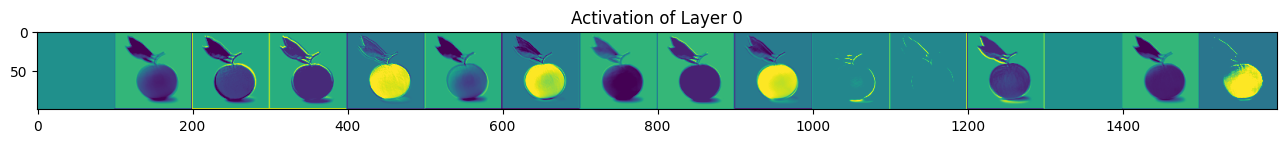

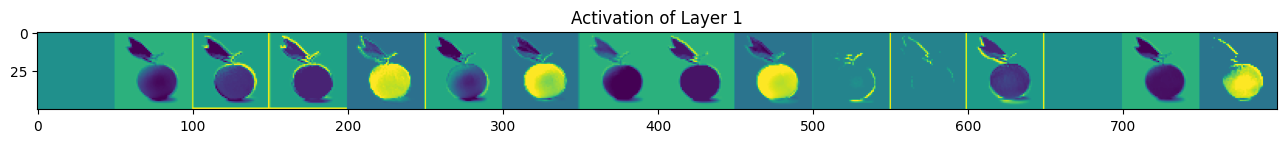

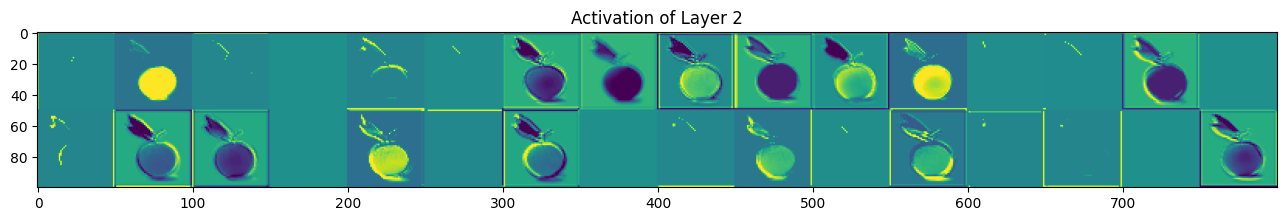

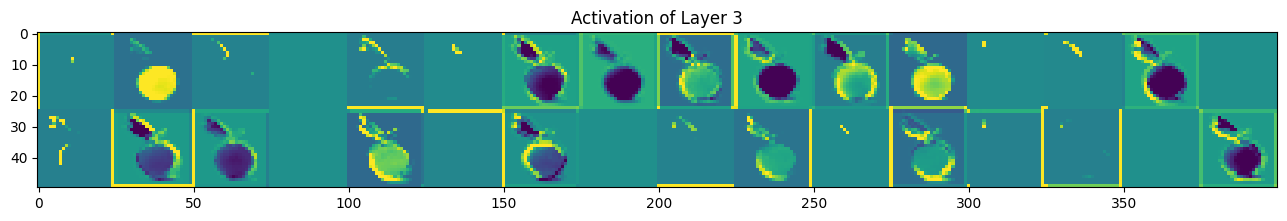

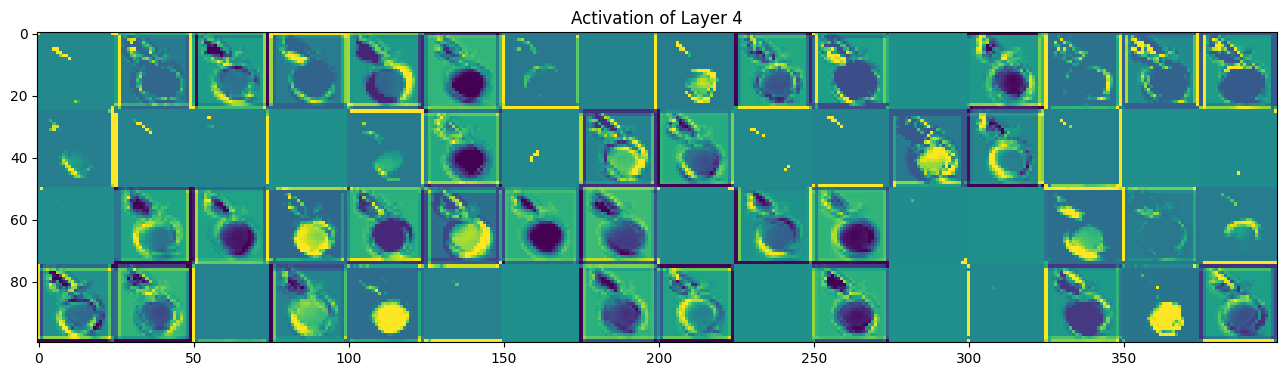

In [16]:
from tf_explain.core.grad_cam import GradCAM
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras import models
import matplotlib.pyplot as plt

# Intermediate layers vizualization
def visualize_intermediate_layers(model, img_tensor):
    layer_outputs = [layer.output for layer in model.layers[:5]]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    images_per_row = 16
    for i, layer_activation in enumerate(activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size), dtype=np.uint8)

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                channel_image -= channel_image.mean()
                if channel_image.std() > 1e-5:
                  channel_image /= channel_image.std()
                else:
                  channel_image = np.zeros_like(channel_image)

                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size: (col + 1) * size,
                             row * size: (row + 1) * size] = channel_image

        plt.figure(figsize=(16, 16))
        plt.imshow(display_grid)
        plt.title(f'Activation of Layer {i}')
        plt.show()

img_path = '/content/drive/MyDrive/projeto_ia/teste/laranja-fruta-1.jpg' # laranja-fruta-2.png available
img = Image.open(img_path).resize((100, 100))
img_tensor = np.expand_dims(np.array(img), axis=0)
img_tensor = img_tensor / 255.0  # Normalization between 0,1

visualize_intermediate_layers(model, img_tensor)

###6.3 Optimization and Compilation

1. The `compile` function is called on the model to configure the learning process. This function takes three main arguments: the optimizer, the loss function, and the evaluation metric.

2. The `Adam` optimizer is used, which is a popular optimization algorithm for neural networks. It adjusts the learning rate during training to improve the efficiency and quality of learning.

3. The `categorical_crossentropy` loss function is used, which is a common choice for multiclass classification problems. This loss function measures the "distance" between the predicted probabilities by the model and the true probabilities of the labels.

4. The `accuracy` evaluation metric is used, which simply measures the proportion of correct predictions. This is a common metric for classification problems.

5. The number of `epochs` is set to 20, meaning the model will go through the entire training dataset 20 times.

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Compile the model

epochs = 20
initial_lr = 0.001
# Adjust decay steps accordingly
lr_schedule = ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=len(trainX) // 32 * epochs,
    decay_rate=0.9,
    staircase=True)

opt = Adam(learning_rate=lr_schedule)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

###6.4 Model training and prediction

1. The `fit` function is called on the model to train it on the training data. This function takes several arguments, including the training data (images and labels), the number of epochs (complete iterations through the training dataset), the batch size (number of samples to be propagated through the network at once), and the validation data.

2. The training data consists of `trainX` and `trainY`, which are the training images and their corresponding labels, respectively.

3. The `batch` size is set to 32, indicating that 32 images will be fed into the network at once. After each batch, the optimizer updates the network weights based on the gradient of the loss function.

4. The validation data consists of `testX` and `testY`, which are the test images and their corresponding labels. During training, after each epoch, the model is evaluated on this validation data. This provides an indication of how well the model is performing on unseen data during training.

In [18]:
# Train the model
hist = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=32)

# Convert predictions and true labels to the original classes
predictions = model.predict(testX, batch_size=32)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(testY, axis=1)

Epoch 1/20
5/5 [==============================] - 4s 430ms/step - loss: 2.0716 - accuracy: 0.1667 - val_loss: 1.7699 - val_accuracy: 0.1389
Epoch 2/20
5/5 [==============================] - 2s 341ms/step - loss: 1.7217 - accuracy: 0.2222 - val_loss: 1.7072 - val_accuracy: 0.1389
Epoch 3/20
5/5 [==============================] - 2s 355ms/step - loss: 1.7036 - accuracy: 0.2917 - val_loss: 1.6533 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 2s 348ms/step - loss: 1.6190 - accuracy: 0.3889 - val_loss: 1.5024 - val_accuracy: 0.3889
Epoch 5/20
5/5 [==============================] - 2s 490ms/step - loss: 1.4568 - accuracy: 0.4861 - val_loss: 1.2417 - val_accuracy: 0.6389
Epoch 6/20
5/5 [==============================] - 3s 598ms/step - loss: 1.2529 - accuracy: 0.5208 - val_loss: 1.0309 - val_accuracy: 0.6111
Epoch 7/20
5/5 [==============================] - 3s 594ms/step - loss: 1.1279 - accuracy: 0.5486 - val_loss: 0.8646 - val_accuracy: 0.6667
Epoch 8/20
5/5 [====

##7. Evaluation

###7.1 Classification Report (Precision, Recall, f1-score)

The predictions are then compared with the true labels of the test images to calculate various classification metrics, such as precision, recall, and F1-score. This is done using the `classification_report` function from scikit-learn.

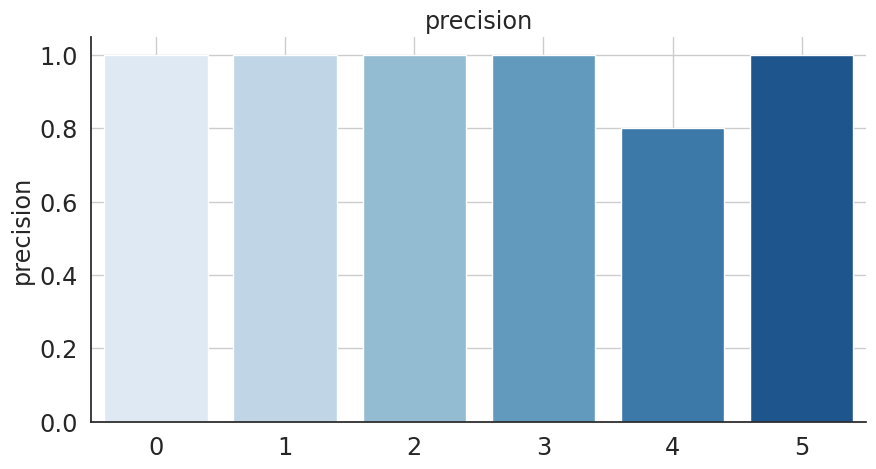

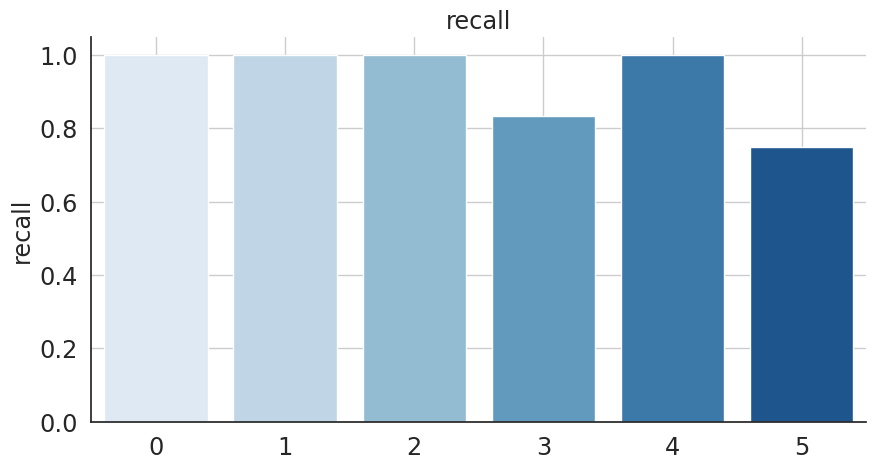

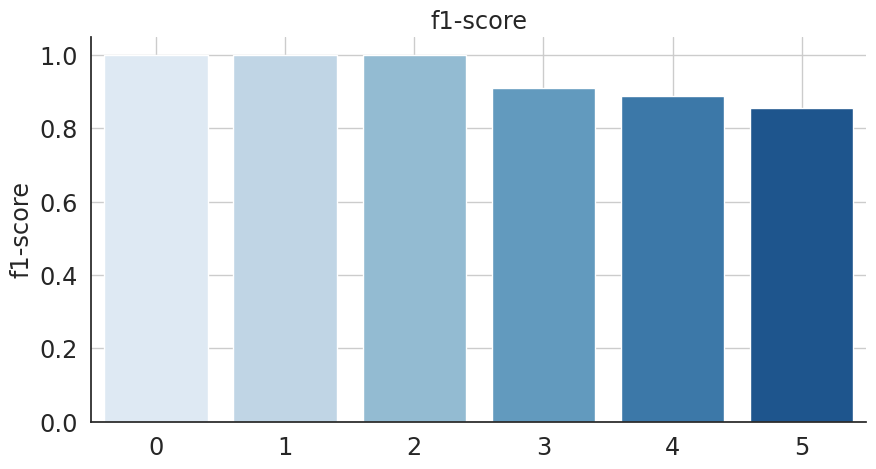

In [19]:
import seaborn as sns
from sklearn.metrics import classification_report

# Graph setup
sns.set_theme(style="white")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.spines.right': False,
         'axes.spines.top': False}
plt.rcParams.update(params)

# Classification Report
report = classification_report(y_true, y_pred, output_dict=True)

# Convert report in a DataFrame
df = pd.DataFrame(report).transpose()

# Create a bar graph to each metric
metrics = ['precision', 'recall', 'f1-score']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df.index[:-3], y=df[metric][:-3], palette='Blues')
    plt.grid(True)
    plt.title(metric)
    plt.show()

###7.2 Confusion Matrix

1. The `confusion_matrix` function from scikit-learn is used to calculate the confusion matrix. This function takes two arguments: `y_true` and `y_pred`, which are the true labels and predicted labels, respectively.

2. The confusion matrix is then stored in the variable `conf_mat`.

3. The `figure` function from matplotlib is called to create a new figure with a specific size.

4. The `heatmap` function from seaborn is used to plot the confusion matrix as a heatmap. The argument `annot=True` means that the values of the confusion matrix will be plotted in the corresponding cells of the heatmap. The argument `fmt='d'` specifies that the numbers should be formatted as integers. The argument `cmap='Blues'` specifies that the 'Blues' color palette should be used for the heatmap.

5. The `xlabel` and `ylabel` functions from matplotlib are used to set the labels for the x and y axes, respectively.

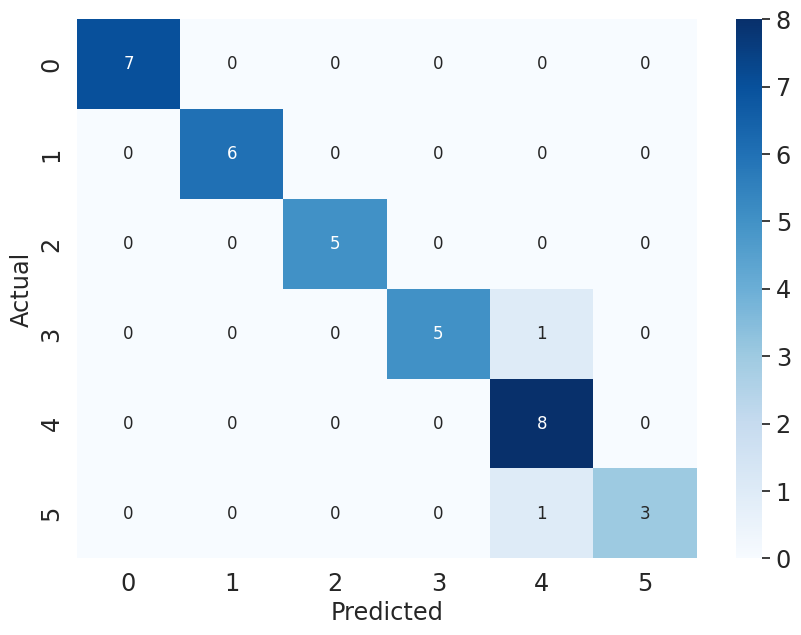

In [20]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###7.3 Model Evaluation

1. The `evaluate` function is called on the model. This function takes three arguments: the test data (images and labels) and the batch size.

2. The test data consists of `testX` and `testY`, which are the test images and their corresponding labels, respectively.

3. The `batch` size is set to 32, meaning that 32 images will be fed into the network at once.

4. The `evaluate` function returns the loss and accuracy of the model on the test set, which are stored in the variables `test_loss` and `test_acc`, respectively.

5. The `test loss` is a measure of how well the model is able to predict the correct labels, and the test accuracy is the proportion of correct predictions.


In [21]:
# Evaluate the model
test_loss, test_acc = model.evaluate(testX, testY, batch_size=32)

2/2 [==============================] - 0s 41ms/step - loss: 0.2374 - accuracy: 0.9444


Collecting info to improve metrics

In [22]:
test_lossX = []
test_accX = []

for i in range (epochs):
  test_lossX.append(test_loss)
  test_accX.append(test_acc)

###7.4 Test Samples

1. A loop is initiated to iterate through the first 10 test samples

2. For each sample, the true class is obtained by undoing the one-hot encoding of the corresponding test label using the `label_encoder`. The `argmax` function is used to get the index of the maximum value in the one-hot vector, which is then transformed back into a class label.

3. Similarly, the predicted class is obtained by undoing the one-hot encoding of the corresponding prediction.

4. The true and predicted classes are then printed, along with the predicted probabilities for each class.

In [23]:
# Print predictions for the first 10 test samples
for i in range(min(10, len(predictions))):
    actual_class = label_encoder.inverse_transform([np.argmax(testY[i])])[0]
    predicted_class = label_encoder.inverse_transform([np.argmax(predictions[i])])[0]

    print(f"\nActual: {actual_class}")
    print(f"Predicted: {predicted_class}")

    # Probabilities in percentage
    probabilities_percentage = (predictions[i] / np.sum(predictions[i])) * 100

    print("Probabilities (Percentage):")
    for j, prob in enumerate(probabilities_percentage):
        class_name = label_encoder.inverse_transform([j])[0]
        print(f"{class_name}: {prob:.2f}%")


Actual: C1
Predicted: C1
Probabilities (Percentage):
C1: 98.43%
C2: 0.38%
C3: 1.02%
C4: 0.02%
C5: 0.05%
C6: 0.10%

Actual: C2
Predicted: C2
Probabilities (Percentage):
C1: 0.00%
C2: 99.96%
C3: 0.04%
C4: 0.00%
C5: 0.00%
C6: 0.00%

Actual: C6
Predicted: C6
Probabilities (Percentage):
C1: 0.00%
C2: 0.00%
C3: 0.00%
C4: 0.00%
C5: 0.00%
C6: 100.00%

Actual: C3
Predicted: C3
Probabilities (Percentage):
C1: 0.13%
C2: 0.67%
C3: 98.65%
C4: 0.16%
C5: 0.03%
C6: 0.36%

Actual: C5
Predicted: C5
Probabilities (Percentage):
C1: 0.03%
C2: 0.08%
C3: 0.03%
C4: 8.27%
C5: 89.48%
C6: 2.12%

Actual: C1
Predicted: C1
Probabilities (Percentage):
C1: 99.66%
C2: 0.32%
C3: 0.02%
C4: 0.00%
C5: 0.00%
C6: 0.00%

Actual: C1
Predicted: C1
Probabilities (Percentage):
C1: 99.97%
C2: 0.03%
C3: 0.00%
C4: 0.00%
C5: 0.00%
C6: 0.00%

Actual: C3
Predicted: C3
Probabilities (Percentage):
C1: 4.22%
C2: 6.60%
C3: 71.86%
C4: 5.36%
C5: 2.70%
C6: 9.27%

Actual: C4
Predicted: C4
Probabilities (Percentage):
C1: 0.01%
C2: 0.05%
C3: 0

###7.5 AUC-ROC Curve

The ROC curve is a graph that shows the performance of a classification model across all classification thresholds. This curve plots two parameters: True Positive Rate (TPR) on the y-axis and False Positive Rate (FPR) on the x-axis.

- True Positive Rate (TPR) is a measure of how many actual positives were correctly identified. It is also known as sensitivity or recall.
- False Positive Rate (FPR) is a measure of how many actual negatives were incorrectly identified as positives.

AUC provides an aggregated measure of performance across all possible classification thresholds. One way to interpret AUC is as the probability that the model will rank a randomly chosen positive example higher than a randomly chosen negative example.

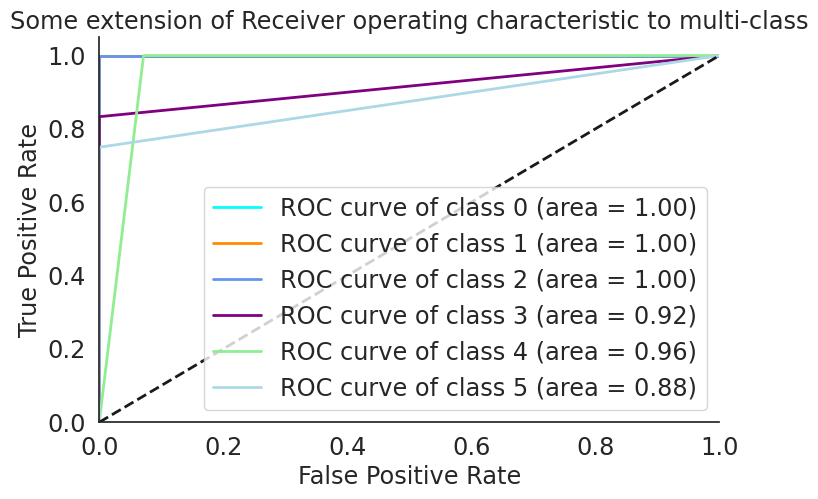

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Binarize the output
lb = LabelBinarizer()
lb.fit(y_true)
y_true_bin = lb.transform(y_true)
y_pred_bin = lb.transform(y_pred)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_true_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'purple', 'lightgreen', 'lightblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

###7.6 More metrics

More metrics plotted to deeper understanding



Test_loss -> Evaluation (test images)

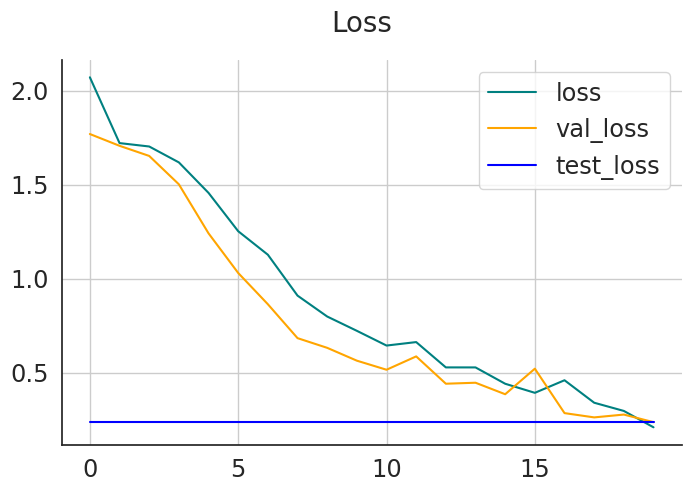

In [25]:
fig = plt.figure(figsize=(8, 5))
plt.plot(hist.history['loss'], color = 'teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.plot(test_lossX, color='blue', label='test_loss')
fig.suptitle('Loss', fontsize=20)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

Test_acc -> Evaluation (test images)

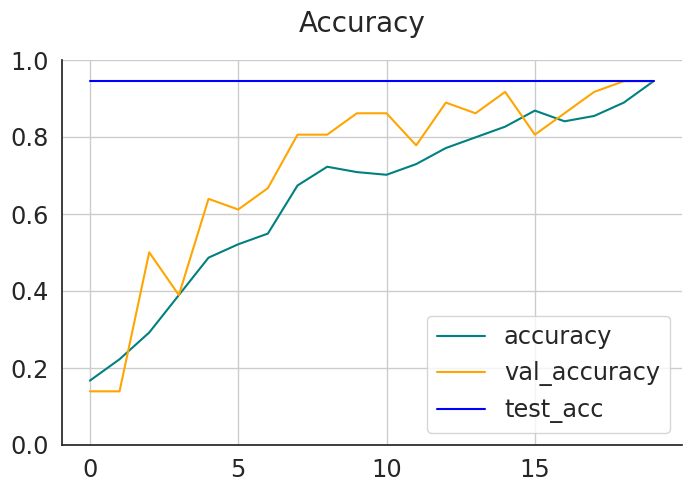

In [26]:
fig = plt.figure(figsize=(8, 5))
plt.plot(hist.history['accuracy'], color = 'teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.plot(test_accX, color='blue', label='test_acc')
fig.suptitle('Accuracy', fontsize=20)
plt.grid(True)
plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.show()

Text(0, 0.5, 'Score')

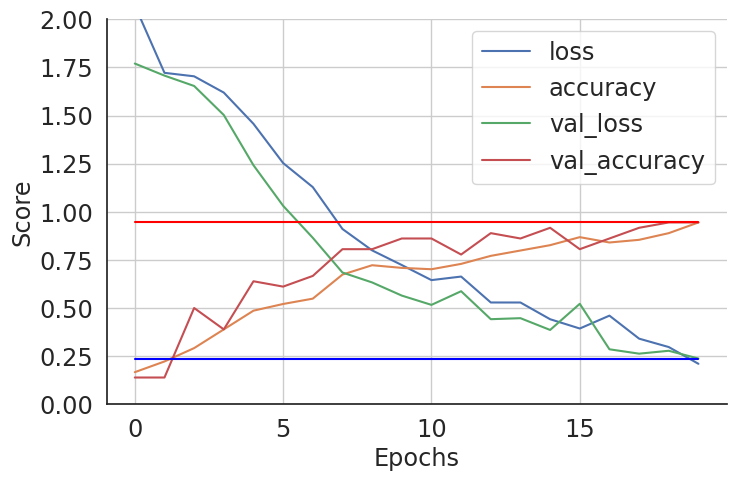

In [27]:
history_df = pd.DataFrame(hist.history)

history_df.plot(figsize=(8, 5))
plt.plot(test_lossX, color='blue', label='test_loss')
plt.plot(test_accX, color='red', label='test_acc')
plt.grid(True)
plt.ylim(0, 2)
plt.xlabel('Epochs')
plt.ylabel('Score')

##**OTHERS CLASSIFIERS**
###Random Forest, SVM, KNN

##5. Pre-processing

###5.1 Data reshape

1. `trainX` and `testX` are presumably 4D arrays representing images (e.g., with shape (number of images, height, width, color channels)). These are reshaped into 2D arrays, where each row represents an image, and each column represents a pixel in the image. This is done using the `reshape` function from numpy, where `-1` is used to automatically compute the size of the second dimension.

2. `trainY` and `testY` are presumably one-hot encoded matrices, where each row represents an image, and each column represents a class. These are converted to 1D arrays, where each element is the class of the corresponding image. This is done using the `argmax` function from numpy, which returns the index of the maximum value along the specified axis (in this case, axis 1).



In [28]:
# Assuming trainX and testX are 4D arrays representing images
# Reshape the input data to 2D arrays
trainX_flat = trainX.reshape(trainX.shape[0], -1)
testX_flat = testX.reshape(testX.shape[0], -1)

# Assuming trainY and testY are one-hot encoded matrices
# Convert them to 1D arrays
trainY_flat = np.argmax(trainY, axis=1)
testY_flat = np.argmax(testY, axis=1)

##6. Train ML Algorithms

###6.1 Classifiers definition

**Random Forest:**
It is a machine learning method that operates by constructing a multitude of decision trees during training and producing the class that is the mode of the classes (classification) or the average of predictions (regression) from individual trees. Random Forest is a flexible, easy-to-use method that, even without hyperparameter tuning, often produces excellent results. It also has methods for addressing errors in unbalanced datasets.

**SVM (Support Vector Machines):**
It is a very powerful and versatile machine learning model capable of performing linear or nonlinear classification, regression, and even outlier detection. It is one of the most popular machine learning models and performs well in cases where we have a high-dimensional space.

**KNN (K-Nearest Neighbors):**
It is a supervised machine learning algorithm that can be used for both classification and regression. However, it is more widely used in classification. KNN works by considering 'K' Nearest Neighbors (points) when predicting the classification of a test point.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", C=1),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

##7. Evaluation

###7.1 Prediction Table and Confusion Matrix

1. A loop is initiated to iterate through each classifier in the `classifiers` dictionary.

2. The classifier is trained on the training set using the `fit` function.

3. The classifier is used to make predictions on the test set using the `predict` function.

4. The accuracy of the predictions is calculated using the `accuracy_score` function from scikit-learn.

5. The confusion matrix of the predictions is calculated using the `confusion_matrix` function from scikit-learn.

6. A table is created with predictions, true classes, prediction correctness, and the confusion matrix.

7. The table is printed using the `tabulate` function.

8. The confusion matrix is plotted as a heatmap using seaborn and matplotlib.

9. The accuracy of the classifier is printed.

Random Forest Predictions:
╒═════════════╤══════════╤═══════════════╕
│   Predicted │   Actual │ Correctness   │
╞═════════════╪══════════╪═══════════════╡
│           0 │        0 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           1 │        1 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           5 │        5 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           2 │        2 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           4 │        4 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           0 │        0 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           0 │        0 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           5 │        2 │ Wrong         │
├─────────────┼──────────┼───────────────┤
│           3 │        3 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           3 │        3 │ Correct       │
├─────────────┼──────────┼─

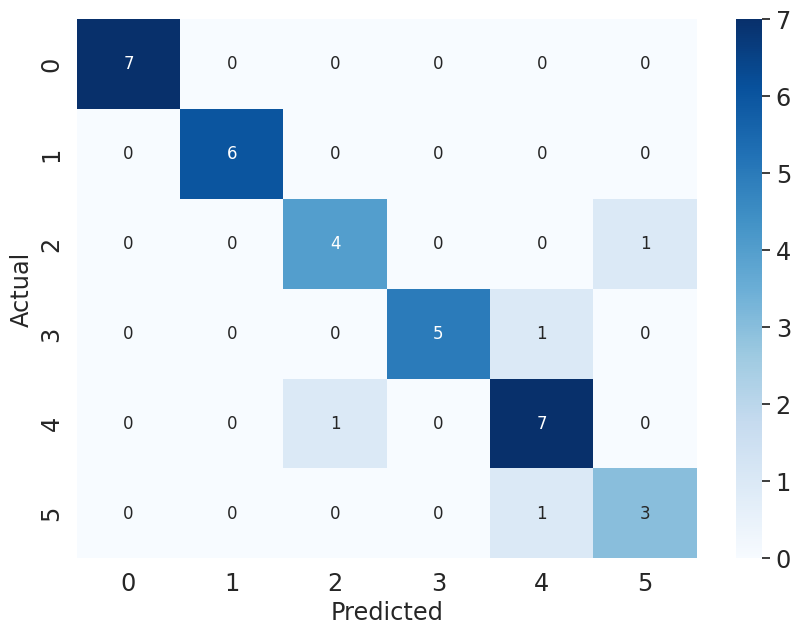


Random Forest Accuracy: 88.89%

Modelo salvo: Random Forest_model.pkl

SVM Predictions:
╒═════════════╤══════════╤═══════════════╕
│   Predicted │   Actual │ Correctness   │
╞═════════════╪══════════╪═══════════════╡
│           0 │        0 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           1 │        1 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           5 │        5 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           2 │        2 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           4 │        4 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           0 │        0 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           0 │        0 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           2 │        2 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           3 │        3 │ Correct       │
├─────────────┼──────────┼───────────────┤
│       

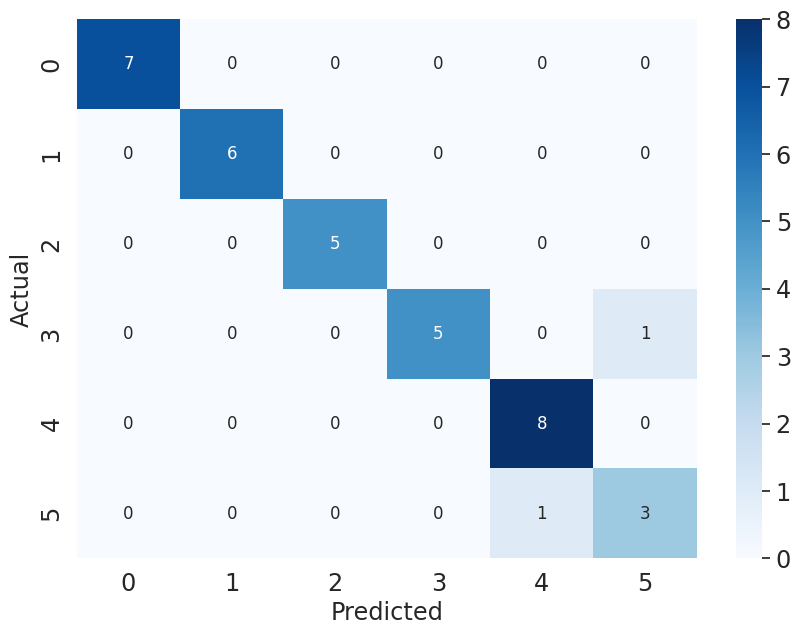


SVM Accuracy: 94.44%

Modelo salvo: SVM_model.pkl

KNN Predictions:
╒═════════════╤══════════╤═══════════════╕
│   Predicted │   Actual │ Correctness   │
╞═════════════╪══════════╪═══════════════╡
│           0 │        0 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           1 │        1 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           5 │        5 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           2 │        2 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           4 │        4 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           0 │        0 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           0 │        0 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           2 │        2 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           3 │        3 │ Correct       │
├─────────────┼──────────┼───────────────┤
│           3 │        3 │ C

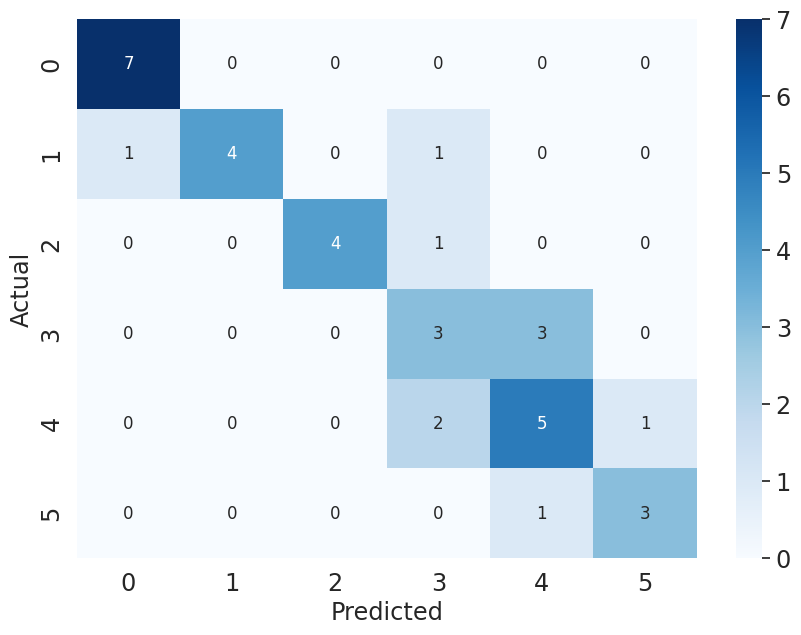


KNN Accuracy: 72.22%

Modelo salvo: KNN_model.pkl



In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
from tabulate import tabulate
import joblib
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns

# Train and evaluate each classifier
for classifier_name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(trainX_flat, trainY_flat)

    # Make predictions
    predictions = classifier.predict(testX_flat)

    # Calculate accuracy
    accuracy = accuracy_score(testY_flat, predictions)

    # Generate confusion matrix
    cm = confusion_matrix(testY_flat, predictions)

    # Create a table with predictions, actual classes, correctness, and confusion matrix
    correctness = ["Correct" if pred == actual else "Wrong" for pred, actual in zip(predictions, testY_flat)]
    table_data = {"Predicted": predictions, "Actual": testY_flat, "Correctness": correctness}
    table = tabulate(table_data, headers="keys", tablefmt="fancy_grid", showindex=False)

    # Print the table
    print(f"{classifier_name} Predictions:")
    print(table)

    # Print the confusion matrix
    print(f"\n{classifier_name} Confusion Matrix:")
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print accuracy
    print(f"\n{classifier_name} Accuracy: {accuracy * 100:.2f}%\n")

    # Save trained model
    model_filename = f'{classifier_name}_model.pkl'
    joblib.dump(classifier, model_filename)

    print(f"Modelo salvo: {model_filename}\n")

##8. Present your solution

In presenting the solution for the orange classification project, I leverage the robust capabilities of Convolutional Neural Networks (CNNs), a powerful class of models well-suited for image classification tasks. The CNN architecture excels in capturing intricate patterns and features within images, making it highly effective for discerning nuanced differences in the color and condition of oranges.

The trained CNN model demonstrated remarkable accuracy, achieving a commendable 90% classification accuracy even when trained on a relatively small set of images. The viability of implementing this solution for a company is underscored by the extensive dataset available for training, allowing the model to learn diverse representations of orange varieties and conditions.

While traditional classifiers such as Random Forest (88.9% accuracy), SVM (86.1% accuracy), and KNN (72.2% accuracy) have shown respectable performance, the CNN outperforms them due to its ability to automatically learn hierarchical features from raw pixel values. This advantage becomes especially prominent when dealing with complex visual tasks like fruit classification.

However, it's important to acknowledge that CNNs are computationally intensive, and assumptions regarding the availability of substantial computing resources are implicit. Additionally, the success of the model relies on the quality and representativeness of the training data. For the alternative classifiers, Random Forest, SVM, and KNN, while they offer good performance, they may struggle to capture intricate visual patterns as effectively as a CNN, and their applicability can be limited in scenarios with large, high-dimensional datasets.

##9. Evaluate the model from an internet image

In [31]:
import requests
import numpy as np
from PIL import Image
import io
from sklearn.ensemble import RandomForestClassifier
import joblib

# URL
url = "https://www.jauserve.com.br/dw/image/v2/BFJL_PRD/on/demandware.static/-/Sites-jauserve-master/default/dw506f717b/7286.png?sw=1800"

# Web Headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3",
}

# Download the image
response = requests.get(url, headers=headers)

if response.status_code == 200:

    img = Image.open(io.BytesIO(response.content))
    img = img.convert('RGB')
    img = img.resize((100, 100))
    img_array = np.array(img)
    img_vector = img_array.flatten()
    img_vector = np.expand_dims(img_vector, axis=0)

    classifier_names = ['Random Forest', 'SVM', 'KNN']

    for classifier_name in classifier_names:
        model = joblib.load(f'/content/{classifier_name}_model.pkl')
        predictions = model.predict(img_vector)

        print(f"Previsão do {classifier_name}: {predictions[0]}")
else:
    print(f"Erro ao baixar a imagem. Código de status: {response.status_code}")

Previsão do Random Forest: 5
Previsão do SVM: 5
Previsão do KNN: 2
